In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.shape

(373, 15)

In [4]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [5]:
df["SES"].fillna("0",inplace=True)

In [6]:
df["MMSE"].fillna("0",inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES            object
MMSE           object
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [9]:
df.drop('MRI ID',axis=1,inplace=True)

In [10]:
df.drop('Subject ID',axis=1,inplace=True)

In [11]:
df['Group'].replace(['Nondemented','Demented','Converted'],[0,1,2],inplace = True)
df['M/F'].replace(['M','F'],[0,1],inplace = True)

In [12]:
df.columns

Index(['Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [13]:
def impute_median(series):
    return series.fillna(series.median())

df["SES"]= df["SES"].transform(impute_median)
df["MMSE"]= df["MMSE"].transform(impute_median)
df.head(5)

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,0,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,0,R,75,12,0,23.0,0.5,1678,0.736,1.046
3,1,2,560,0,R,76,12,0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,0,R,80,12,0,22.0,0.5,1698,0.701,1.034


In [14]:
df.shape

(373, 13)

In [15]:
df.drop('Hand',axis=1,inplace=True)

In [16]:
x = df.drop('Group',axis=1)
y = df['Group']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [17]:
print(x.shape)
print(y.shape)

(373, 11)
(373,)


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(261, 11)
(112, 11)
(261,)
(112,)


In [19]:

sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [20]:
print(x_train_sc.shape)
print(x_test_sc.shape)

(261, 11)
(112, 11)


In [21]:
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,0,75,12,0,23.0,0.5,1678,0.736,1.046
3,1,2,560,0,76,12,0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,0,80,12,0,22.0,0.5,1698,0.701,1.034


In [22]:
x.describe

<bound method NDFrame.describe of      Visit  MR Delay  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0        1         0    0   87    14  2.0  27.0  0.0  1987  0.696  0.883
1        2       457    0   88    14  2.0  30.0  0.0  2004  0.681  0.876
2        1         0    0   75    12    0  23.0  0.5  1678  0.736  1.046
3        2       560    0   76    12    0  28.0  0.5  1738  0.713  1.010
4        3      1895    0   80    12    0  22.0  0.5  1698  0.701  1.034
..     ...       ...  ...  ...   ...  ...   ...  ...   ...    ...    ...
368      2       842    0   82    16  1.0  28.0  0.5  1693  0.694  1.037
369      3      2297    0   86    16  1.0  26.0  0.5  1688  0.675  1.040
370      1         0    1   61    13  2.0  30.0  0.0  1319  0.801  1.331
371      2       763    1   63    13  2.0  30.0  0.0  1327  0.796  1.323
372      3      1608    1   65    13  2.0  30.0  0.0  1333  0.801  1.317

[373 rows x 11 columns]>

In [42]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Accuracy: ',metrics.accuracy_score(y_test, ypred))
   
    print(cm)
    print(classification_report(ytest,ypred))

In [24]:
lr = LogisticRegression()
lr.fit(x_train_sc,y_train)  

LogisticRegression()

In [37]:
ypred_lr = lr.predict(x_test_sc)
print(ypred)

[1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 2 1 0 0 1 0 0 0
 0 0 1 0 0 1 2 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 2 1 0 0 1 0 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 1]


In [38]:
print('Train Score',lr.score(x_train_sc,y_train)) 
print('Test Score',lr.score(x_test_sc,y_test))    

Train Score 0.9425287356321839
Test Score 0.875


In [28]:
m1 = KNeighborsClassifier(n_neighbors=11)
m1.fit(x_train_sc,y_train)

KNeighborsClassifier(n_neighbors=11)

In [29]:
ypred_m1 = m1.predict(x_test_sc)
print(ypred)

[1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 2 1 0 0 1 0 0 0
 0 0 1 0 0 1 2 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 2 1 0 0 1 0 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 1]


C:\Users\mehul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
svm1 = SVC(kernel='rbf',gamma=0.01)
svm1.fit(x_train_sc,y_train)

SVC(gamma=0.01)

In [31]:
ypred_svm1=svm1.predict(x_test_sc)

In [32]:
print('Train Score',svm1.score(x_train_sc,y_train))
print('Test Score',svm1.score(x_test_sc,y_test))

Train Score 0.9080459770114943
Test Score 0.8660714285714286


In [33]:
svm2 = SVC(kernel='linear')
svm2.fit(x_train_sc,y_train)

SVC(kernel='linear')

In [34]:
print('Train Score',svm2.score(x_train_sc,y_train))
print('Test Score',svm2.score(x_test_sc,y_test))

Train Score 0.9425287356321839
Test Score 0.8571428571428571


In [35]:
ypred_svm2 = svm2.predict(x_test_sc)

In [50]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(x_train_sc, y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
ypred_clf = clf.predict(x_test_sc)

In [55]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train_sc, y_train)

RandomForestClassifier(random_state=0)

In [56]:
ypred_rfc = rfc.predict(x_test_sc)

In [43]:
print("FOR LOGISTIC REGRESSION :- \n")
eval_model(y_test,ypred_lr)

FOR LOGISTIC REGRESSION :- 

Accuracy:  0.875
[[51  1  0]
 [ 0 45  1]
 [ 8  4  2]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.90      0.98      0.94        46
           2       0.67      0.14      0.24        14

    accuracy                           0.88       112
   macro avg       0.81      0.70      0.70       112
weighted avg       0.85      0.88      0.84       112



In [47]:
print("FOR SVM USING LINEAR KERNEL :- \n")
eval_model(y_test,ypred_svm2)

FOR SVM USING LINEAR KERNEL :- 

Accuracy:  0.8571428571428571
[[51  1  0]
 [ 0 43  3]
 [ 8  4  2]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.90      0.93      0.91        46
           2       0.40      0.14      0.21        14

    accuracy                           0.86       112
   macro avg       0.72      0.69      0.68       112
weighted avg       0.82      0.86      0.83       112



In [48]:
print("FOR SVM USING RBF KERNEL :- \n")
eval_model(y_test,ypred_svm1)

FOR SVM USING RBF KERNEL :- 

Accuracy:  0.8660714285714286
[[51  1  0]
 [ 0 46  0]
 [ 8  6  0]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.87      1.00      0.93        46
           2       0.00      0.00      0.00        14

    accuracy                           0.87       112
   macro avg       0.58      0.66      0.62       112
weighted avg       0.76      0.87      0.81       112



C:\Users\mehul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print("FOR K NEIGHBORS CLASSIFIER :- \n")
eval_model(y_test,ypred_m1)

FOR K NEIGHBORS CLASSIFIER :- 

Accuracy:  0.7857142857142857
[[52  0  0]
 [ 9 36  1]
 [13  1  0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.83        52
           1       0.97      0.78      0.87        46
           2       0.00      0.00      0.00        14

    accuracy                           0.79       112
   macro avg       0.56      0.59      0.56       112
weighted avg       0.73      0.79      0.74       112



In [54]:
print("FOR DECISION TREE CLASSIFIER :- \n")
eval_model(y_test,ypred_clf)

FOR DECISION TREE CLASSIFIER :- 

Accuracy:  0.8392857142857143
[[46  1  5]
 [ 0 43  3]
 [ 6  3  5]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        52
           1       0.91      0.93      0.92        46
           2       0.38      0.36      0.37        14

    accuracy                           0.84       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.83      0.84      0.84       112



In [57]:
print("FOR RANDOM FOREST CLASSIFIER :- \n")
eval_model(y_test,ypred_rfc)

FOR RANDOM FOREST CLASSIFIER :- 

Accuracy:  0.8839285714285714
[[50  1  1]
 [ 0 45  1]
 [ 6  4  4]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        52
           1       0.90      0.98      0.94        46
           2       0.67      0.29      0.40        14

    accuracy                           0.88       112
   macro avg       0.82      0.74      0.75       112
weighted avg       0.87      0.88      0.86       112



In [62]:
data = {'LG':87.5, 'SVM1':86.6, 'SVM2':85.7, 'KNN':78.5, 'Decision tree':83.9, 'Random forest':88.3}

In [63]:
Algorithm = list(data.keys())
values = list(data.values())

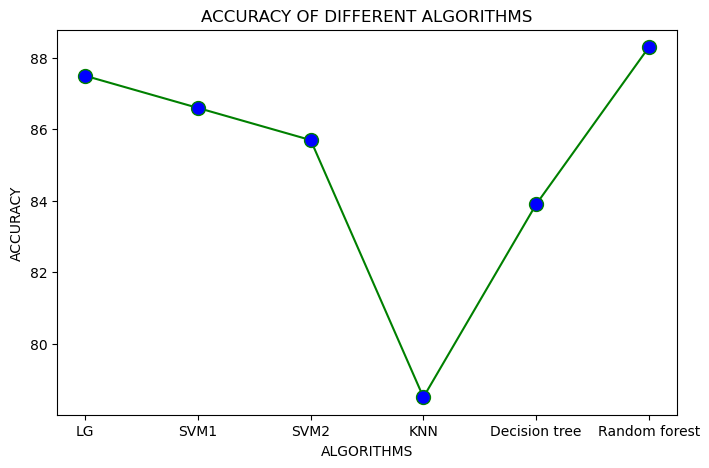

In [81]:
fig = plt.figure(figsize = (8, 5))
plt.plot(Algorithm, values, color ='green',marker = 'o',
         markerfacecolor = 'blue', markersize = 10)
plt.xlabel("ALGORITHMS")
plt.ylabel("ACCURACY")
plt.title("ACCURACY OF DIFFERENT ALGORITHMS")
plt.show()